# Consolidate pass through nodes

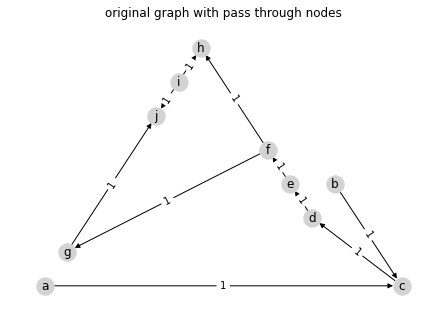

In [1]:
import matplotlib.pyplot as plt
import networkx as nx

edges = [('a', 'c'), ('b', 'c'), ('c', 'd'), ('d', 'e'), ('e', 'f'), ('f', 'g'), ('f', 'h'), ('i', 'h'), ('i', 'j'), ('g', 'j')]
g = nx.DiGraph()
g.add_edges_from(edges)
nx.set_edge_attributes(g, 1, name='length')

pos = nx.planar_layout(g)
nx.draw(g, pos=pos, with_labels='True', node_color='lightgrey')
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'length'))
plt.title('original graph with pass through nodes')
plt.show()

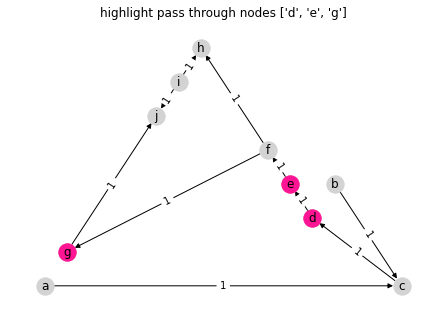

In [2]:
def pass_through_nodes(g):
  return [n for n, d in nx.degree(g) if d == 2 and len(g.edges(n)) == 1]

d2_thru_nodes = pass_through_nodes(g)

nx.draw(g, pos=pos, with_labels='True', node_color='lightgrey')
nx.draw_networkx_nodes(g, pos=pos, nodelist=d2_thru_nodes, node_color='deeppink')
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'length'))
plt.title(f'highlight pass through nodes {d2_thru_nodes}')
plt.show()

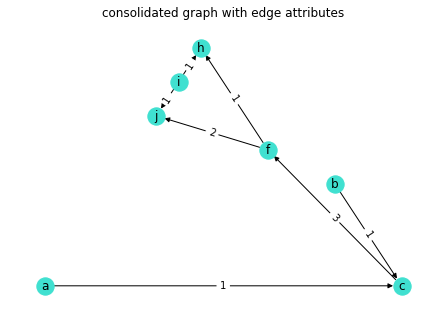

In [3]:
def consolidate_pass_through_nodes(g, edge_attribute_label):
  process_nodes = pass_through_nodes(g)
  while len(process_nodes) > 0:
    nr = process_nodes.pop()
    n0 = list(g.in_edges(nr))[0][0]
    n1 = list(g.out_edges(nr))[0][1]
    g.add_edge(n0, n1)
    edge_attr = nx.get_edge_attributes(g, edge_attribute_label)
    agg_attr = edge_attr[(n0, nr)] + edge_attr[(nr, n1)]
    nx.set_edge_attributes(g, {(n0, n1): agg_attr}, name=edge_attribute_label)
    g.remove_node(nr)

consolidate_pass_through_nodes(g, 'length')

nx.draw(g, pos=pos, with_labels='True', node_color='turquoise')
nx.draw_networkx_edge_labels(g, pos=pos, edge_labels=nx.get_edge_attributes(g, 'length'))
plt.title('consolidated graph with edge attributes')
plt.show()